In [609]:
#Kütüphaneler eklendi
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.model_selection, sklearn.metrics, sklearn.ensemble, sklearn.linear_model, sklearn.tree, sklearn.neighbors

In [610]:
data_pre = pd.read_csv('dataset.csv')
data_pre.head(5)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [611]:
data_pre.tail(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [612]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [613]:
data_pre.shape

(34857, 21)

In [614]:
data_pre.drop_duplicates(inplace=True)
data_pre.dropna(subset=['Price'],inplace=True)
data_pre.shape

(27247, 21)

In [615]:
landsize_upper = data_pre['Landsize'].mean() + 3*data_pre['Landsize'].std()
landsize_lower = data_pre['Landsize'].mean() - 3*data_pre['Landsize'].std()

buildingarea_upper = data_pre['BuildingArea'].mean() + 3*data_pre['BuildingArea'].std()
buildingarea_lower = data_pre['BuildingArea'].mean() - 3*data_pre['BuildingArea'].std()

landsize_upper

11865.288219308133

In [616]:
data_pre = data_pre[(data_pre['Landsize'] < landsize_upper) | (data_pre['Landsize'] > landsize_lower)]
data_pre = data_pre[(data_pre['BuildingArea'] < buildingarea_upper) | (data_pre['BuildingArea'] > buildingarea_lower)]

In [617]:
data_pre.Lattitude.tail(1000)

30958   -37.77749
30964   -37.61786
30967   -37.94625
30975   -37.83742
30976   -38.13024
           ...   
34847   -37.61940
34849   -37.61031
34853   -37.81551
34854   -37.82286
34856   -37.81810
Name: Lattitude, Length: 1000, dtype: float64

In [618]:
data_pre.dropna(subset=['Method'])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,...,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [619]:
categorical_columns = ['Lattitude','Longtitude','YearBuilt','Bathroom', 'Car']
for column in categorical_columns:
  data_pre[column] = data_pre[column].fillna(data_pre[column].mode().iloc[0])

In [620]:
data_pre.Suburb = data_pre.Suburb.astype('category')
data_pre.Address = data_pre.Address.astype('string')
data_pre.Type = data_pre.Type.astype('category')
data_pre.Car = data_pre.Car.astype('int64')
data_pre.Bathroom = data_pre.Bathroom.astype('int64')
data_pre.Method = data_pre.Method.astype('category')
data_pre.SellerG = data_pre.SellerG.astype('category')
data_pre.CouncilArea = data_pre.CouncilArea.astype('category')
data_pre.Regionname = data_pre.Regionname.astype('category')
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9382 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         9382 non-null   category
 1   Address        9382 non-null   string  
 2   Rooms          9382 non-null   int64   
 3   Type           9382 non-null   category
 4   Price          9382 non-null   float64 
 5   Method         9382 non-null   category
 6   SellerG        9382 non-null   category
 7   Date           9382 non-null   object  
 8   Distance       9382 non-null   float64 
 9   Postcode       9382 non-null   float64 
 10  Bedroom2       9382 non-null   float64 
 11  Bathroom       9382 non-null   int64   
 12  Car            9382 non-null   int64   
 13  Landsize       9382 non-null   float64 
 14  BuildingArea   9382 non-null   float64 
 15  YearBuilt      9382 non-null   float64 
 16  CouncilArea    9382 non-null   category
 17  Lattitude      9382 non-null   f

In [621]:
data_pre.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [622]:
data_pre.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

<Axes: >

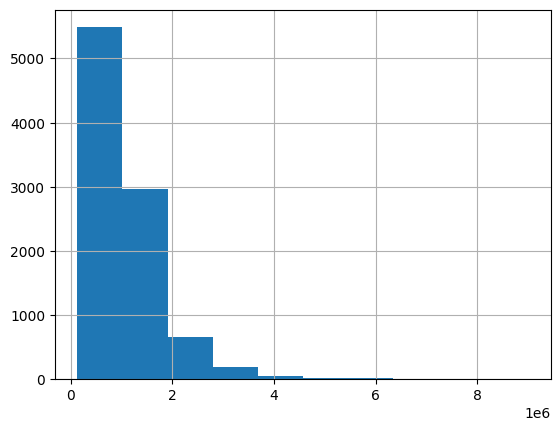

In [623]:
data_pre.Price.hist()

In [624]:
#sb.pairplot(data_pre)

In [625]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [626]:
le_regionname = LabelEncoder()
data_pre['Regionname'] = le_regionname.fit_transform(data_pre['Regionname'])
le_type = LabelEncoder()
data_pre['Type'] = le_type.fit_transform(data_pre['Type'])
le_suburb = LabelEncoder()
data_pre['Suburb'] = le_suburb.fit_transform(data_pre['Suburb'])
le_address = LabelEncoder()
data_pre['Address'] = le_address.fit_transform(data_pre['Address'])
le_method = LabelEncoder()
data_pre['Method'] = le_method.fit_transform(data_pre['Method'])



In [627]:
columns = ['Suburb', 'Address', 'Rooms', 'Type', 'Distance','Method', 'Regionname', 'Propertycount', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Longtitude', 'Lattitude']
X = pd.DataFrame()
for col in columns:
  X[col] = data_pre[col]

y = data_pre['Price']
X.Suburb = X.Suburb.astype('category')
X.Address = X.Address.astype('category')
X.Method = X.Method.astype('category')
X.Type = X.Type.astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9382 entries, 2 to 34856
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         9382 non-null   category
 1   Address        9382 non-null   category
 2   Rooms          9382 non-null   int64   
 3   Type           9382 non-null   category
 4   Distance       9382 non-null   float64 
 5   Method         9382 non-null   category
 6   Regionname     9382 non-null   int64   
 7   Propertycount  9382 non-null   float64 
 8   Bedroom2       9382 non-null   float64 
 9   Bathroom       9382 non-null   int64   
 10  Car            9382 non-null   int64   
 11  Landsize       9382 non-null   float64 
 12  BuildingArea   9382 non-null   float64 
 13  YearBuilt      9382 non-null   float64 
 14  Longtitude     9382 non-null   float64 
 15  Lattitude      9382 non-null   float64 
dtypes: category(4), float64(8), int64(4)
memory usage: 1.3 MB


In [628]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size= 0.8)


In [629]:
X_train.head(5)

,Suburb,Address,Rooms,Type,Distance,Method,Regionname,Propertycount,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Longtitude,Lattitude
15946,259,3513,4,0,34.7,3,4,2756.0,4.0,2,1,534.0,152.0,2002.0,145.20139,-38.09083
3975,119,5427,4,1,8.0,0,6,9264.0,3.0,3,2,374.0,267.0,2015.0,144.89110,-37.75070
13881,304,690,4,0,8.2,0,6,5058.0,4.0,1,2,528.0,143.0,1940.0,144.86470,-37.79690
13072,168,8868,3,0,12.8,1,6,5629.0,3.0,2,1,162.0,115.0,2015.0,144.86640,-37.73080
8846,243,5167,4,0,2.6,1,2,14949.0,2.0,3,1,544.0,241.0,1920.0,144.99220,-37.81520


In [630]:
y_train.head(5)

15946     555698.0
3975     1250000.0
13881     970000.0
13072     635000.0
8846     3001000.0
Name: Price, dtype: float64

In [631]:
models = {
'Lasso': {
'model': sklearn.linear_model.Lasso()
},
'LinearRegression': {
'model': sklearn.linear_model.LinearRegression()
},
'Ridge': {
'model': sklearn.linear_model.Ridge()
},
'ElasticNet': {
'model': sklearn.linear_model.ElasticNet()
},
'KNeighborsRegressor': {
'model': sklearn.neighbors.KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': sklearn.ensemble.RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': sklearn.ensemble.GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': sklearn.ensemble.AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
}
}

In [632]:
for learning_model in models:
  models[learning_model]['model'].fit(X_train,y_train)
  predictions = models[learning_model]['model'].predict(X_test)
  #models[learning_model]['predictions'] = predictions
  models[learning_model]['MAE'] = sklearn.metrics.mean_absolute_error(y_test, predictions)
  models[learning_model]['MSE'] = sklearn.metrics.mean_squared_error(y_test, predictions, squared= False)
  models[learning_model]['RMSE'] = sklearn.metrics.mean_squared_error(y_test, predictions, squared= True)
  models[learning_model]['R2'] = sklearn.metrics.r2_score(y_test, predictions)

In [633]:
models

{'Lasso': {'model': Lasso(),
  'MAE': 277204.20970375434,
  'MSE': 412237.22197938256,
  'RMSE': 169939527185.27872,
  'R2': 0.5944476852524796},
 'LinearRegression': {'model': LinearRegression(),
  'MAE': 277204.5163366545,
  'MSE': 412237.44932516036,
  'RMSE': 169939714626.11417,
  'R2': 0.5944472379341543},
 'Ridge': {'model': Ridge(),
  'MAE': 277227.4760604791,
  'MSE': 412240.3301698579,
  'RMSE': 169942089818.55347,
  'R2': 0.5944415696543393},
 'ElasticNet': {'model': ElasticNet(),
  'MAE': 315301.32023216895,
  'MSE': 458112.3064653046,
  'RMSE': 209866885334.96112,
  'R2': 0.49916301083001424},
 'KNeighborsRegressor': {'model': KNeighborsRegressor(),
  'MAE': 365431.3561001599,
  'MSE': 542460.3899081512,
  'RMSE': 294263274619.3035,
  'R2': 0.29775518301323267},
 'RandomForestRegressor': {'model': RandomForestRegressor(),
  'MAE': 161812.0762209199,
  'MSE': 274324.94058817375,
  'RMSE': 75254173028.70506,
  'R2': 0.8204096211652544},
 'GradientBoostingRegressor': {'model':

In [634]:
y_test

2278      754000.0
32621     760000.0
14404     525000.0
12506    2110000.0
923      1860000.0
           ...    
12848    1760000.0
23482     350000.0
5749      680000.0
17239     780000.0
59       1195000.0
Name: Price, Length: 1877, dtype: float64